# 1. Log Transformation

#### * Worked in Positive skewed distribution
####  * Not effective on Negative skewed distribution
####  * Outlier mange
#### y = log(x)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
np.random.seed(0)
data = {
    'value': np.random.exponential(scale=2.0,size=1000)
}
df = pd.DataFrame(data)

In [3]:
df

,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


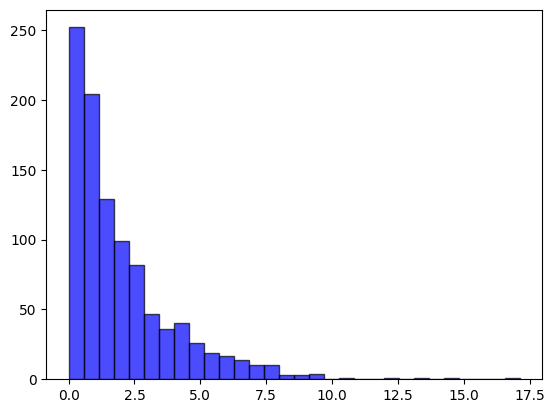

In [4]:
plt.hist(df['value'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

In [5]:
skew(df['value'])

2.0526452829685935

In [6]:
df['log_transform_value'] = np.log(df['value']+1)

In [7]:
df.head(3)

,value,log_transform_value
0,1.591749,0.952333
1,2.511862,1.256146
2,1.846446,1.046071


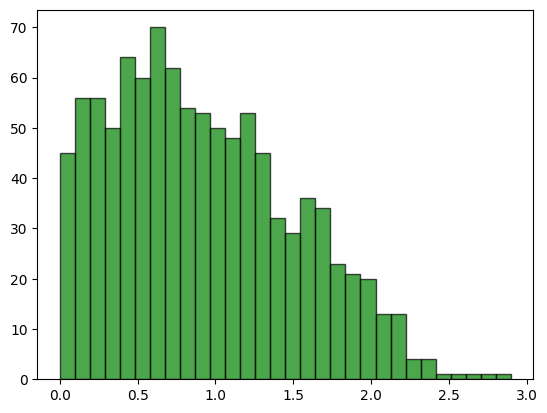

In [8]:
plt.hist(df['log_transform_value'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

In [9]:
skew(df['log_transform_value'])

0.49140926471790436

# 2. Square root Transfromation

#### 𝑦 = sqr_root(x)

#### Exactly work as log transformation

In [10]:
np.random.seed(0)
data_1 = {
    'original_data': np.random.exponential(scale=2.0,size=1000)
}
df_1 = pd.DataFrame(data_1)

In [11]:
df_1

,original_data
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


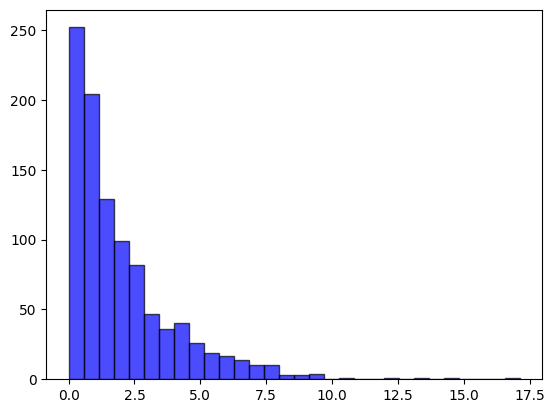

In [12]:
plt.hist(df_1['original_data'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

In [13]:
skew(df_1['original_data'])

2.0526452829685935

In [21]:
df_1['squrt_transformed'] = np.sqrt(df_1['original_data'])

In [22]:
df_1.head(3)

,original_data,squrt_transformed
0,1.591749,1.261645
1,2.511862,1.584885
2,1.846446,1.358840


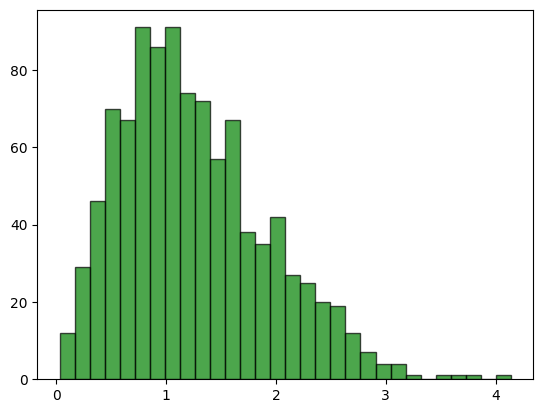

In [27]:
plt.hist(df_1['squrt_transformed'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

In [26]:
skew(df_1['squrt_transformed'])

0.6920163230320187

# 3. Reciprocal Transformation

#### y = 1 / x

#### * Same as log & squrt Trabsfromation and highly negative skewed data then we can use this

In [32]:

data_2 = np.random.exponential(scale=2.0,size=1000)
data_2 = 50 - data_2
df_2 = pd.DataFrame(data_2,columns=['original'])

In [33]:
df_2

,original
0,48.931257
1,48.013558
2,46.984574
3,46.184881
4,46.609870
...,...
995,49.139543
996,48.858588
997,46.456052
998,44.599652


In [35]:
skew(df_2['original'])

-2.275861809399678

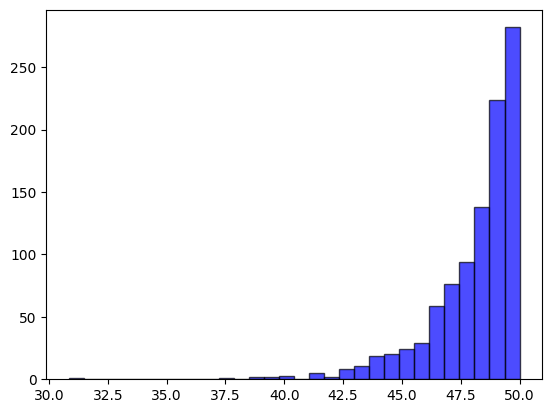

In [36]:
plt.hist(df_2['original'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

In [38]:
df_2['reciprocal_trns']  = 1/df_2['original']

In [42]:
df_2.head(3)

,original,reciprocal_trns
0,48.931257,0.020437
1,48.013558,0.020827
2,46.984574,0.021284


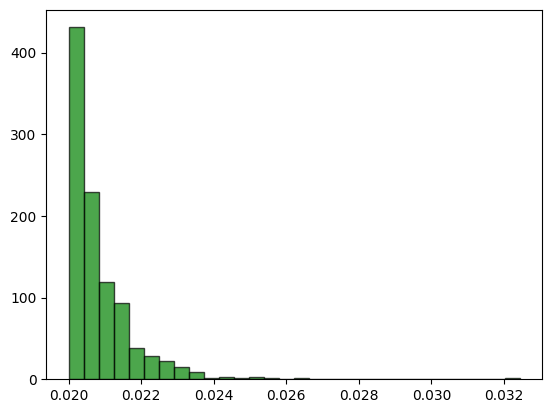

In [39]:
plt.hist(df_2['reciprocal_trns'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

In [43]:
skew(df_2['reciprocal_trns'])

3.5030417686336524

# 4. Box Cox transformation

#### used in big data

#### formula : y = ( X.power(λ) - 1 ) λ where λ!=0   or   y = log(x) where λ=0 

In [44]:
np.random.seed(0)
data = {
    'A': np.random.exponential(scale=2.0,size=1000),
    'B': np.random.chisquare(df=2,size=1000)
}
df_3 = pd.DataFrame(data)

In [45]:
df_3

,A,B
0,1.591749,1.797296
1,2.511862,0.020229
2,1.846446,1.291864
3,1.574402,2.467287
4,1.102097,0.089943
...,...,...
995,0.205564,3.133538
996,1.446892,2.554508
997,5.574577,1.308268
998,0.519217,2.064885


In [46]:
print(skew(df_3['A']))
print(skew(df_3['B']))

2.0526452829685935
1.7494418645601095


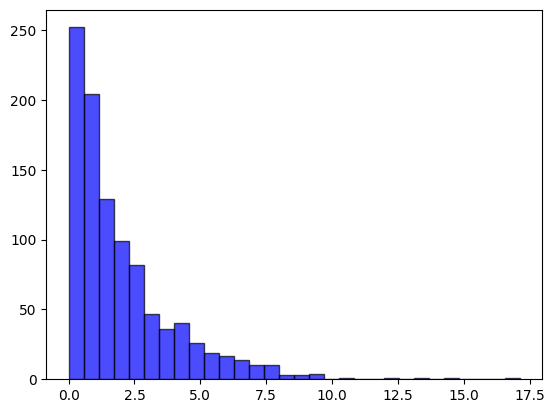

In [47]:
plt.hist(df_3['A'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

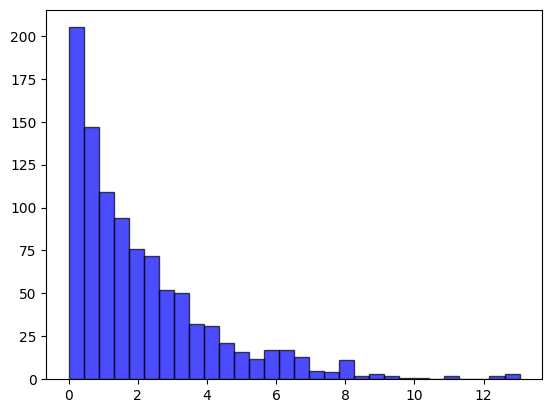

In [48]:
plt.hist(df_3['B'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

In [49]:
from scipy.stats import boxcox

In [50]:
df_3['trans_A'],lambda_value_a = boxcox(df_3['A'])

In [57]:
lambda_value_a

0.24201319781520778

In [51]:
df_3['trans_B'],lambda_value_b = boxcox(df_3['B'])

In [58]:
lambda_value_b

0.26829917070784687

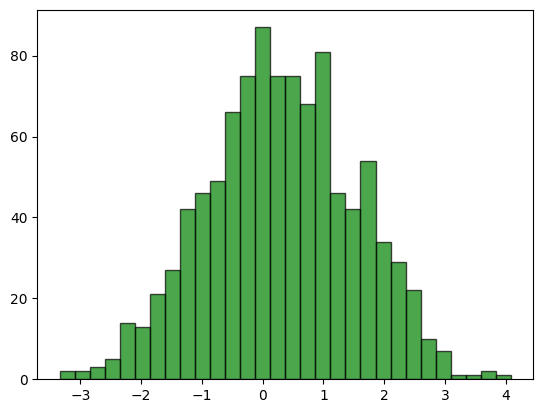

In [52]:
plt.hist(df_3['trans_A'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

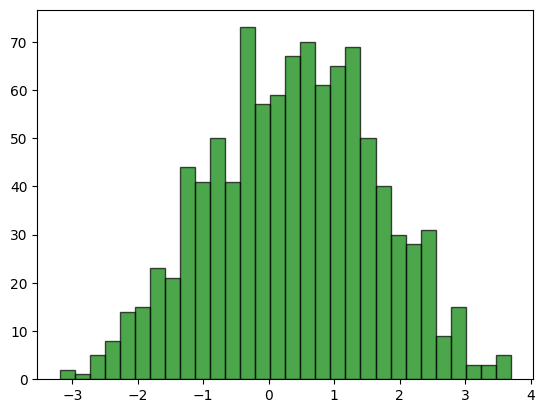

In [53]:
plt.hist(df_3['trans_B'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

In [55]:
skew(df_3['trans_A'])

-0.031578572476943456

In [56]:
skew(df_3['trans_B'])

-0.05776865919882928

# 5. Yeo johnson transformation

#### Modify version of boxcox

In [59]:
np.random.seed(0)
data = {
    'A': np.random.exponential(scale=2.0,size=1000),
    'B': np.random.chisquare(df=2,size=1000)
}
df_4 = pd.DataFrame(data)

In [60]:
df_4

,A,B
0,1.591749,1.797296
1,2.511862,0.020229
2,1.846446,1.291864
3,1.574402,2.467287
4,1.102097,0.089943
...,...,...
995,0.205564,3.133538
996,1.446892,2.554508
997,5.574577,1.308268
998,0.519217,2.064885


In [62]:
print(skew(df_4['A']))
print(skew(df_4['B']))

2.0526452829685935
1.7494418645601095


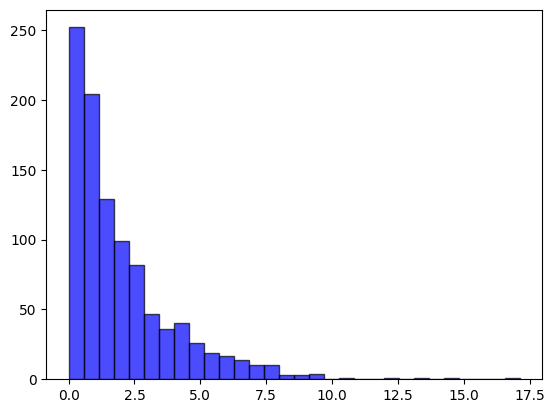

In [63]:
plt.hist(df_4['A'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

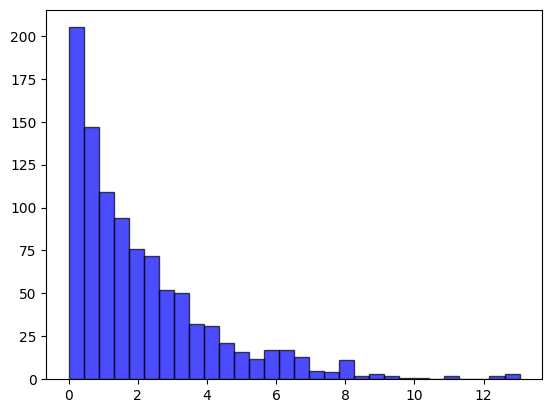

In [64]:
plt.hist(df_4['B'],bins=30,color='blue',alpha=0.7,edgecolor='black')
plt.show()

In [65]:
from scipy.stats import yeojohnson

In [66]:
df_4['trans_A'],lambda_value_a = yeojohnson(df_4['A'])
df_4['trans_B'],lambda_value_a = yeojohnson(df_4['B'])

In [67]:
lambda_value_a

-0.31872482012617814

In [68]:
lambda_value_b

0.26829917070784687

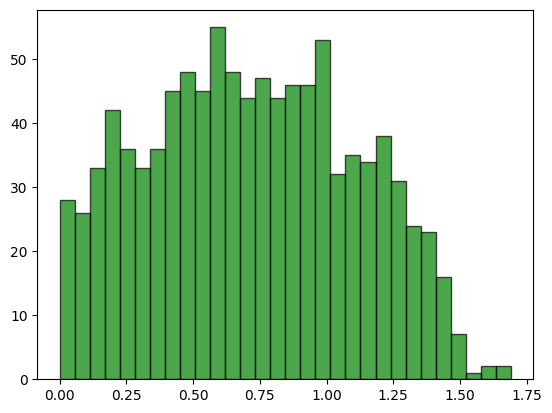

In [69]:
plt.hist(df_4['trans_A'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

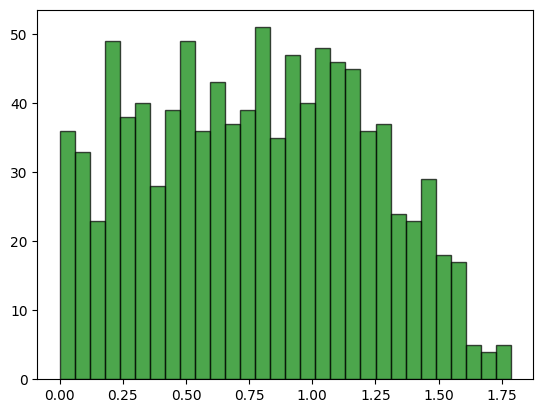

In [70]:
plt.hist(df_4['trans_B'],bins=30,color='green',alpha=0.7,edgecolor='black')
plt.show()

In [71]:
skew(df_4['trans_A'])

0.0746745170544324

In [73]:
skew(df_4['trans_B'])

0.06143245312398474